# Notebook to create visualizations to see winner/scores for each sentence

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
csv = pd.read_csv("final_elo_rankings.csv")
csv.index = range(1, len(csv) + 1)
csv.index.name = 'sentence ID'
csv

,sentence_start,llama2,llama3,mistral,Human1,Human2,Human3,Human4,Human5,Human6,Human7,winner
sentence ID,,,,,,,,,,,,
1,It is expected that both ecological and social...,911.752855,1069.140509,1037.010242,1034.104691,1034.671978,1051.936236,917.400986,900.805485,1069.639793,973.537226,Riley
2,The prompt acceleration of food aid pledges an...,1029.529978,970.329772,1031.515572,892.285353,1116.109299,1002.822998,1007.978252,893.267456,1029.467455,1026.693866,Ashlin
3,Some men were hesitant to assist with househol...,1024.852354,891.709846,952.246685,915.193939,1013.844112,1030.654966,1074.018800,1072.251349,987.644240,1037.583709,Maryam
4,Pastoralists in the arid and semi-arid regions...,1015.636074,1047.552381,1043.942990,930.772495,1045.782044,988.867714,1061.502990,888.854041,1008.518745,968.570524,Maryam
5,The recent investment in improving existing ro...,900.194717,918.843927,922.947856,1080.443476,956.008924,1056.112468,1018.733769,1057.605268,1098.636241,990.473355,Riley
6,Wind turbine foundations may act as artificial...,878.537629,956.446692,975.499404,1029.875274,1016.208313,1108.090782,931.891405,1009.144032,1076.656600,1017.649867,Kuldeep
7,"However, wars have been waged to reduce demogr...",945.260318,892.730461,1001.992705,986.977424,1073.525225,904.796554,1117.245470,987.208971,1089.943263,1000.319609,Maryam
8,The direct and indirect effects from offshore ...,958.532522,890.639909,892.192046,1100.599298,1016.607988,1088.093654,1038.749423,1014.731416,1041.738700,958.115045,Aadarsh
9,"The study shows that the cultivation of crops,...",1059.591856,996.927805,969.139095,1023.341983,1057.836703,1071.422562,982.754543,874.219830,906.225496,1058.540127,Kuldeep


### Graph of who won each sentence

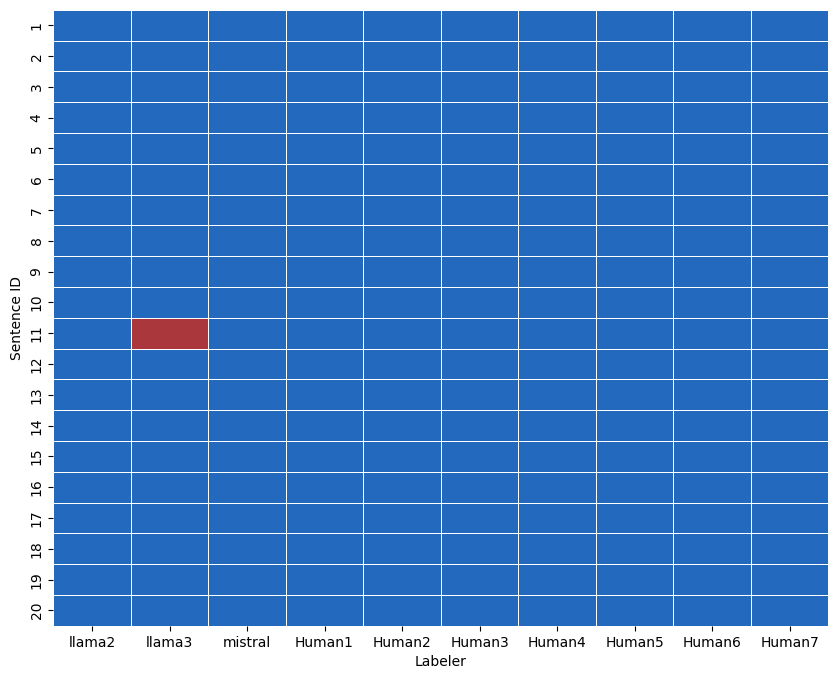

In [7]:
# List of all labelers
labelers = ['llama2', 'llama3', 'mistral', 'Human1', 'Human2', 'Human3', 'Human4', 'Human5', 'Human6', 'Human7']

# extract the 'winner' column and create a pivot table for the heatmap
winner_pivot = csv.pivot_table(index='sentence ID', columns='winner', aggfunc='size', fill_value=0)

# add even labelers not in "winner" to the plot
for labeler in labelers:
    if labeler not in winner_pivot.columns:
        winner_pivot[labeler] = 0

# reorder the columns to match the labelers list
winner_pivot = winner_pivot[labelers]

# create the heatmap
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(winner_pivot, annot=False, cmap = cmap, cbar = False, linewidths=.5)
#plt.title('Winners for Each Sentence')
plt.ylabel('Sentence ID')
plt.xlabel('Labeler')
plt.show()

### Average ELO by labeler

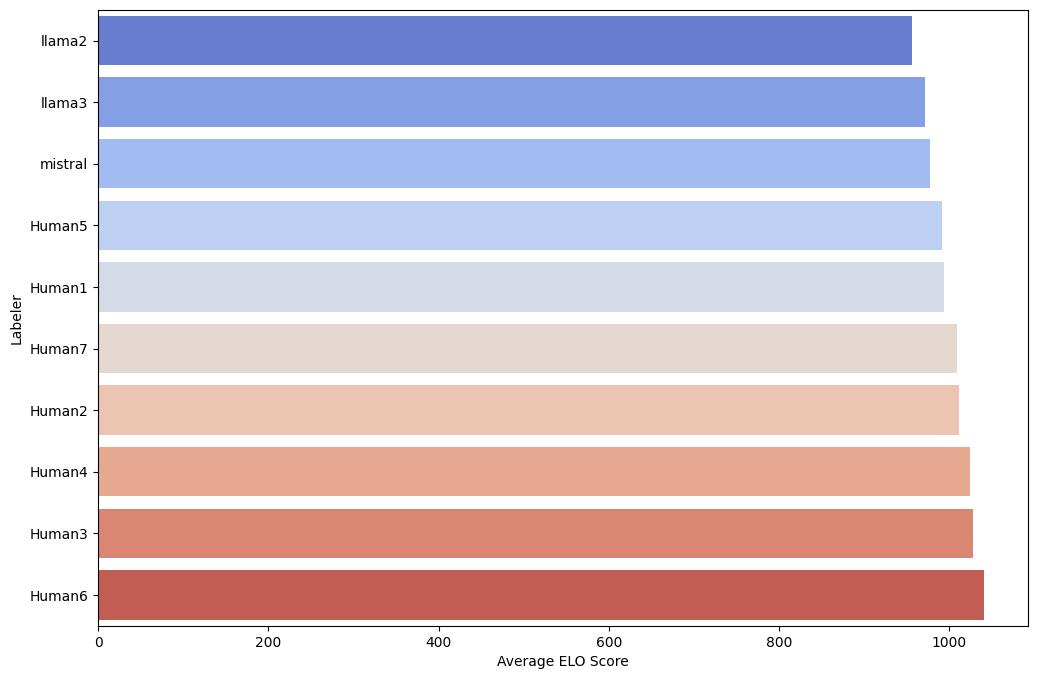

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_elo_scores = csv[labelers].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_elo_scores.values, y=avg_elo_scores.index, palette='coolwarm')
#plt.title('Average ELO Scores by Labeler')
plt.xlabel('Average ELO Score')
plt.ylabel('Labeler')
plt.show()

### ELO Score by Labeler Heatmap

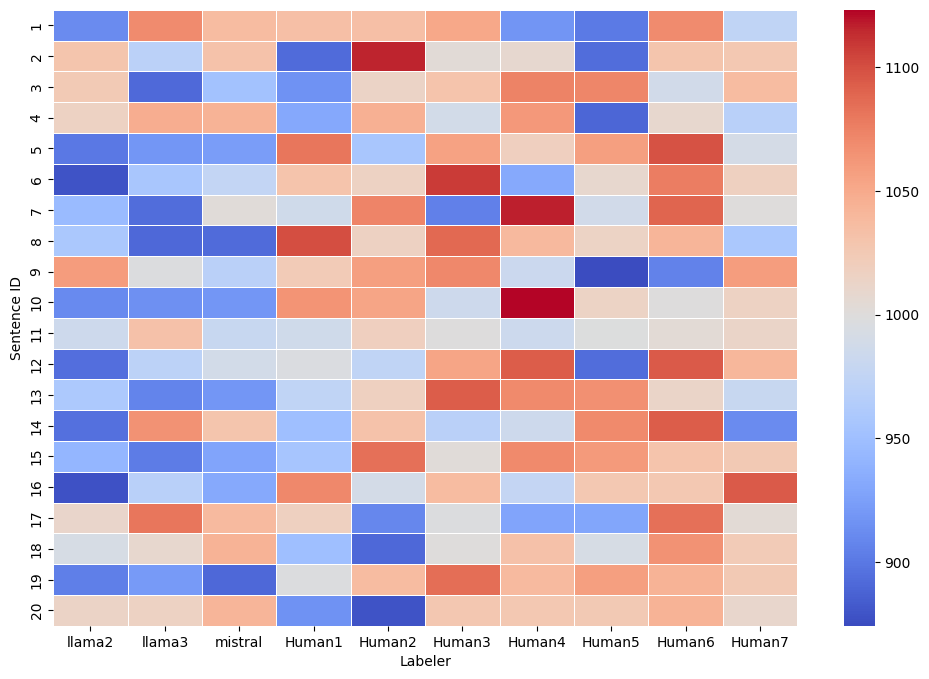

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(csv[labelers], annot=False, cmap='coolwarm', linewidths=.5)
#plt.title('Heatmap of ELO Scores')
plt.xlabel('Labeler')
plt.ylabel('Sentence ID')
plt.show()